# Construction of Concentration Profile function

In [232]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import os
import geopandas as gpd
from libpysal.weights import Queen
from numpy import inf
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

#url = 'https://raw.githubusercontent.com/renanxcortes/inequality-segregation-supplementary-files/master/data/std_2010_fullcount.csv'
os.chdir('C:/Users/renan/Desktop/full_count_2010')
census_2010 = pd.read_csv('std_2010_fullcount.csv', encoding = "ISO-8859-1", sep = ",")
df = census_2010.loc[census_2010.county == "Riverside County"][['trtid10','tract','pop10','nhblk10']]
df.head()

,trtid10,tract,pop10,nhblk10
5727,6065042012,Census Tract 420.12,6242,677
5729,6065041911,Census Tract 419.11,10258,844
5731,6065041910,Census Tract 419.10,6342,405
5733,6065040816,Census Tract 408.16,2594,346
5735,6065040815,Census Tract 408.15,3586,429


In [233]:
map_url = 'https://raw.githubusercontent.com/renanxcortes/inequality-segregation-supplementary-files/master/Tracts_grouped_by_County/06065.json'
map_gpd = gpd.read_file(map_url)
map_gpd['INTGEOID10'] = pd.to_numeric(map_gpd["GEOID10"])
df_map = map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')
df_mp = df_map[['GEOID10', 'tract', 'geometry', 'pop10', 'nhblk10']]
df_mp.head()

,GEOID10,tract,geometry,pop10,nhblk10
0,06065042012,Census Tract 420.12,"POLYGON ((-117.319414 33.902109, -117.322528 3...",6242,677
1,06065041911,Census Tract 419.11,"POLYGON ((-117.504056 33.800257, -117.502758 3...",10258,844
2,06065041910,Census Tract 419.10,"POLYGON ((-117.472451 33.762031, -117.475661 3...",6342,405
3,06065040816,Census Tract 408.16,"POLYGON ((-117.5285 33.89736, -117.529425 33.8...",2594,346
4,06065040815,Census Tract 408.15,"POLYGON ((-117.501299 33.89424899999999, -117....",3586,429


In [234]:
t = 0.05
g_t_i = np.where(df_mp.nhblk10 / df_mp.pop10 >= t, 1, 0)
g_t_i

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [235]:
v_t = (g_t_i * df_mp.nhblk10).sum() / df_mp.nhblk10.sum()
v_t

0.8207867439040819

In [236]:
grid = np.linspace(0, 1, 100)

In [237]:
def calculate_vt(t):
    g_t_i = np.where(df_mp.nhblk10 / df_mp.pop10 >= t, 1, 0)
    v_t = (g_t_i * df_mp.nhblk10).sum() / df_mp.nhblk10.sum()
    return v_t

In [238]:
curve = np.array(list(map(calculate_vt, grid)))

In [239]:
grid[grid < 0.1]

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909])

In [240]:
curve[grid < 0.1]

array([1.        , 0.99556783, 0.97048363, 0.93305267, 0.88345682,
       0.81794423, 0.74631551, 0.66336387, 0.56264987, 0.50344874])

# Constructing the function

In [241]:
def conprof(data, group_pop_var, total_pop_var, m = 1000):
    '''
    data: a geopandas DataFrame that contains a geometry column
    group_pop_var: the name of variable that contains the population size of the group of interest
    total_pop_var: the name of variable that contains the total population of the unit
    m: a numeric value indicating the number of thresholds to be used. A large value of m creates a smoother-looking graph and a more precise concentration profile value but slows down the calculation speed.
    '''
    
    data = data.rename(columns={group_pop_var: 'group_pop_var', 
                                total_pop_var: 'total_pop_var'})
    
    def calculate_vt(t):
        g_t_i = np.where(data.group_pop_var / data.total_pop_var >= t, 1, 0)
        v_t = (g_t_i * data.group_pop_var).sum() / data.group_pop_var.sum()
        return v_t
    
    grid = np.linspace(0, 1, m)
    curve = np.array(list(map(calculate_vt, grid)))
    
    threshold = data.group_pop_var.sum() / data.total_pop_var.sum()
    R = ((threshold - ((curve[grid < threshold]).sum() / m - (curve[grid >= threshold]).sum()/ m)) / (1 - threshold))
    
    return R, grid, curve, threshold

In [242]:
cp_index = conprof(df_mp, 'nhblk10', 'pop10', m = 1000)
cp_index[0]

0.06393365660089256

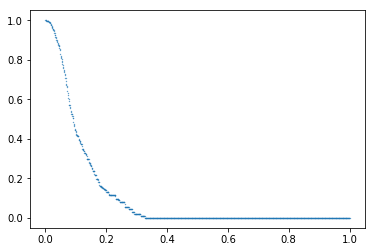

In [243]:
matplotlib.pyplot.scatter(cp_index[1], 
                          cp_index[2], s = 0.1)

# Spatial Proximity Profile

This measure is similar to the Concentration Profile, but with the addition of the spatial component in the connecting function.

$$\eta_t = \frac{k^2-k}{\sum_{i}\sum_{j}\delta_{ij}}$$

where $k$ refers to the number of census tracts in $X_t$ and $\delta_{ij}$ is the distance between $i$ and $j$. One way of determining $\delta_{ij}$ would be to use a spatial structure matrix, $W$. The matrix $W$ present ones if $i$ and $j$ are contiguous and zero, otherwise. The distance $\delta_{ij}$ between $i$ and $j$ is given by is the order of how neighbors is needes to reach from $i$ to $j$. For example, two census tracts, $x_1$ and $x_2$, that do not have a common boundary but both are adjacent to the same unit, $x_3$, are second-order neighbors, so $\delta_{12}$ becomes 2.

Similar to the *concentration profile*, if the number of thresholds used is large enough, a smooth curve, or a *spatial proximity profile*, can be constructed by plotting and connecting $\eta_t$.

In [254]:
wij = Queen.from_dataframe(df_mp).full()[0]
wij

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

We need to find delta instead of wij.

In [255]:
pd.DataFrame(wij)

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
delta = manhattan_distances(wij)
delta

array([[ 0.,  9., 10., ..., 10., 12., 12.],
       [ 9.,  0.,  5., ...,  9., 11., 11.],
       [10.,  5.,  0., ..., 10., 12., 12.],
       ...,
       [10.,  9., 10., ...,  0., 12., 12.],
       [12., 11., 12., ..., 12.,  0., 10.],
       [12., 11., 12., ..., 12., 10.,  0.]])

In [257]:
# Example
t = 0.28
g_t_i = np.where(df_mp.nhblk10 / df_mp.pop10 >= t, True, False)
k = g_t_i.sum()
sub_delta_ij = delta[g_t_i,:][:,g_t_i]
den = sub_delta_ij.sum()
eta_t = (k**2 - k) / den
eta_t

0.08450704225352113

In [258]:
m = 1000
def calculate_etat(t):
    g_t_i = np.where(df_mp.nhblk10 / df_mp.pop10 >= t, True, False)
    k = g_t_i.sum()
    sub_delta_ij = delta[g_t_i,:][:,g_t_i]
    den = sub_delta_ij.sum()
    eta_t = (k**2 - k) / den
    return eta_t

grid = np.linspace(0, 1, m)
aux = np.array(list(map(calculate_etat, grid)))
aux[aux == inf] = 0
aux[aux == -inf] = 0
curve = np.nan_to_num(aux, 0)

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [259]:
curve

array([0.0822563 , 0.08216413, 0.08210204, 0.08201743, 0.08188534,
       0.08194118, 0.08192825, 0.08213181, 0.08212088, 0.08224472,
       0.08213234, 0.08200883, 0.08189123, 0.08243042, 0.08248855,
       0.08246109, 0.08254089, 0.08263406, 0.08289345, 0.08295139,
       0.08280676, 0.08285498, 0.08291162, 0.08285212, 0.08291522,
       0.08274585, 0.08280868, 0.08299482, 0.0833507 , 0.08322142,
       0.08343971, 0.08346966, 0.08337316, 0.08327372, 0.08332232,
       0.0832175 , 0.08328863, 0.08343927, 0.08322869, 0.08322342,
       0.08350694, 0.0835023 , 0.08370596, 0.08336212, 0.08335306,
       0.08335306, 0.08283935, 0.08293092, 0.0829512 , 0.08307101,
       0.08318809, 0.08291996, 0.08329077, 0.08287439, 0.08292254,
       0.08325709, 0.08332765, 0.08302779, 0.08294413, 0.08320765,
       0.08358129, 0.08357112, 0.08389029, 0.08364074, 0.08355462,
       0.08355951, 0.08355951, 0.08355844, 0.08375875, 0.08395006,
       0.08395919, 0.08397151, 0.08430526, 0.08436604, 0.08413

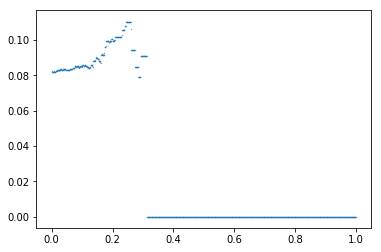

In [260]:
matplotlib.pyplot.scatter(grid, 
                          curve, s = 0.1)

In [261]:
threshold = df_mp.nhblk10.sum() / df_mp.pop10.sum()
SPP = ((threshold - ((curve[grid < threshold]).sum() / m - (curve[grid >= threshold]).sum()/ m)) / (1 - threshold))
SPP

0.09112912525931849